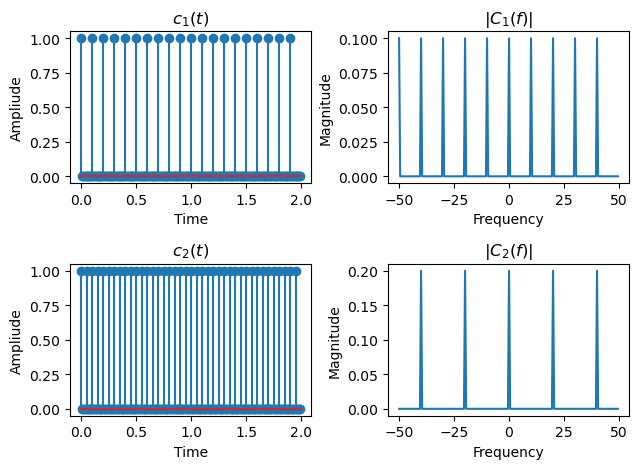

In [1]:
# Fourier transform of train of impulse
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Step 1: Generation of comb functions
Fs = 100
t = np.arange(0, 2, 1 / Fs)
f = np.linspace(-Fs / 2, Fs / 2, len(t), endpoint=False)
T1 = 0.1
c1 = np.zeros(len(t))
c1[:: int(Fs * T1)] = 1
T2 = 0.05
c2 = np.zeros(len(t))
c2[:: int(Fs * T2)] = 1
# Step 2: Fourier transform of comb function
C1 = fftshift(fft(c1))
C2 = fftshift(fft(c2))
# Step 3: Plotting the result
plt.subplot(2, 2, 1), plt.stem(t, c1), plt.xlabel("Time"), plt.ylabel("Ampliude"),
plt.title("$c_1(t)$"), plt.subplot(2, 2, 2), plt.plot(f, np.abs(C1) / len(C1))
plt.xlabel("Frequency"), plt.ylabel("Magnitude"), plt.title("$|C_1(f)|$")
plt.subplot(2, 2, 3), plt.stem(t, c2), plt.xlabel("Time"), plt.ylabel("Ampliude"),
plt.title("$c_2(t)$"), plt.subplot(2, 2, 4), plt.plot(f, np.abs(C2) / len(C2))
plt.xlabel("Frequency"), plt.ylabel("Magnitude"), plt.title("$|C_2(f)|$")
plt.tight_layout()

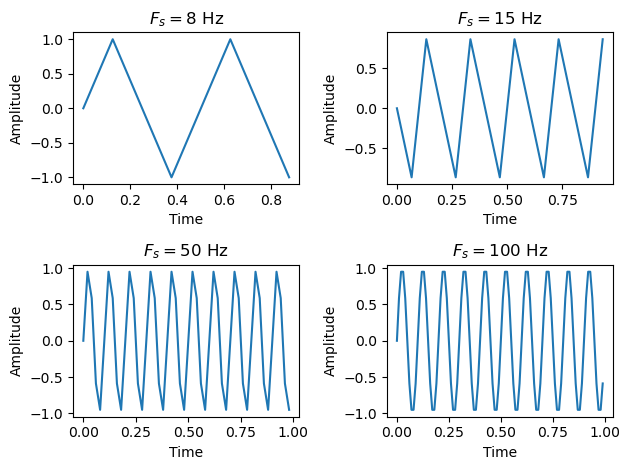

In [2]:
# Aliasig in time domain
import numpy as np
import matplotlib.pyplot as plt

f = 10  # Signal frequency
fs = [8, 15, 50, 100]  # Sampling frequencies
for i in range(len(fs)):
    t = np.arange(0, 1, 1 / fs[i])
    x = np.sin(2 * np.pi * f * t)
    plt.subplot(2, 2, i + 1)
    plt.plot(t, x), plt.xlabel("Time"), plt.ylabel("Amplitude")
    plt.title("$F_s={} $ Hz".format(fs[i]))
    plt.tight_layout()

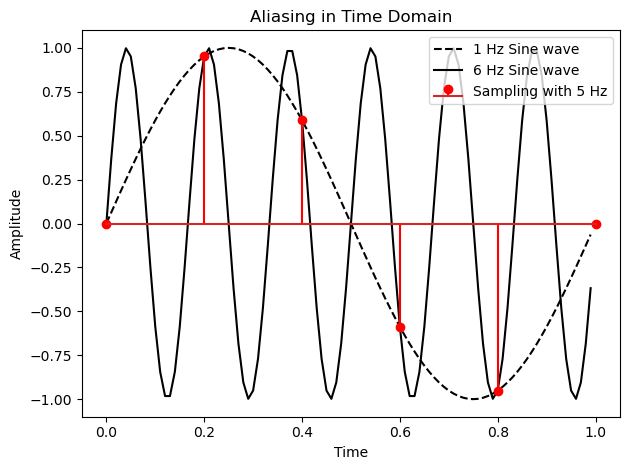

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: To generate x1 and x2
f1 = 1  # Signal frequency
f2 = 6
fs = 100
t = np.arange(0, 1, 1 / fs)
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * f2 * t)
# Step 2: New sampling frequency is 5 Hz
fs1 = 5
t1 = np.arange(0, 1.1, 1 / fs1)
x3 = np.sin(2 * np.pi * f1 * t1)
# Step 3: Plotting the result
plt.plot(t, x1, "k--", t, x2, "k"),  # plt.plot(t,x2,'k')
plt.stem(t1, x3, "r"), plt.xlabel("Time"), plt.ylabel("Amplitude")
plt.legend(["1 Hz Sine wave", "6 Hz Sine wave", "Sampling with 5 Hz"]),
plt.title("Aliasing in Time Domain")
plt.tight_layout()

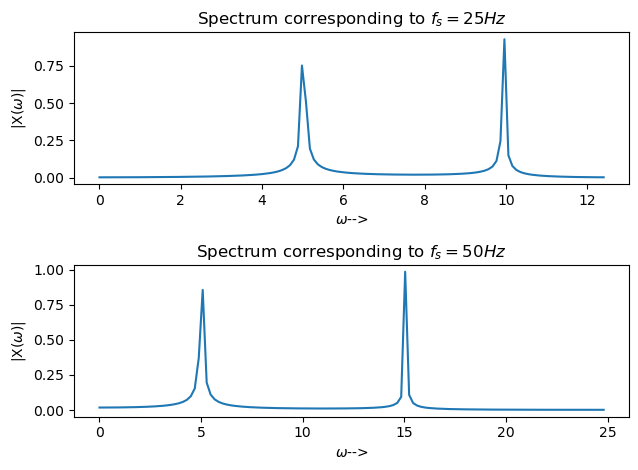

In [4]:
# Sampling theorem
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Step 1: Generate the two signals
f1 = 5
f2 = 15
fs = [25, 50]
N = 256
for i in range(len(fs)):
    T = 1 / fs[i]
    t = np.linspace(0, N * T, N)
    x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    X = fft(x)
    f_axis = fftfreq(N, T)[0 : N // 2]
    plt.subplot(2, 1, i + 1)
    plt.plot(f_axis, 2 / N * np.abs(X[0 : N // 2]))
    plt.xlabel("$\omega$-->"), plt.ylabel("|X($\omega$)|"),
    plt.title(r"Spectrum corresponding to $f_s = {} Hz$".format(fs[i]))
    plt.tight_layout()

In [5]:
# Hearing aliasing
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

fs = 1500
dur = 1
T = 1 / fs
t = np.linspace(0, 1, dur * fs)
x1 = np.sin(2 * np.pi * 500 * t)
x2 = np.sin(2 * np.pi * 1000 * t)
x = np.concatenate([x1, x2])
sd.play(x, fs)

In [6]:
# Hearing aliasing
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

fs = 1500
dur = 1
T = 1 / fs
t = np.linspace(0, 1, dur * fs)
x1 = np.sin(2 * np.pi * 500 * t)
x2 = np.sin(2 * np.pi * 1000 * t)
x = np.concatenate([x1, x2])
sd.play(x, fs)

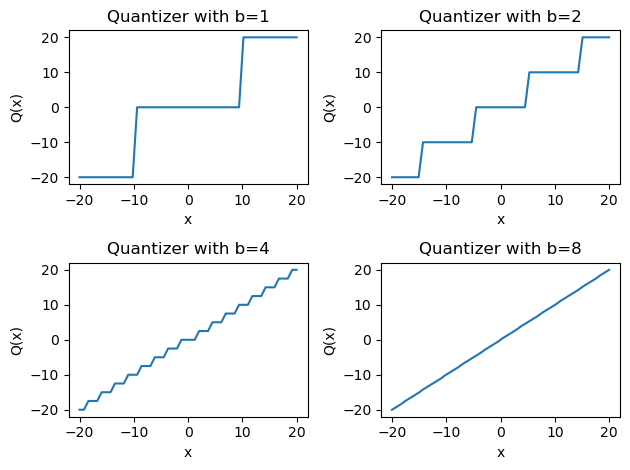

In [7]:
# Transfer characteristics of mid-tread quantizer
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-20, 20)
DR = np.max(x) - np.min(x)  # Dynamic range
b = [1, 2, 4, 8]  # Bits
for i in range(len(b)):
    L = 2 ** b[i]  # Reconstruction level
    q = DR / L
    # Mid-tread quantizer
    y = np.sign(x) * q * np.floor((abs(x) / q) + (1 / 2))
    plt.subplot(2, 2, i + 1), plt.plot(x, y), plt.xlabel("x"), plt.ylabel("Q(x)")
    plt.title("Quantizer with b={}".format(b[i]))
    plt.tight_layout()

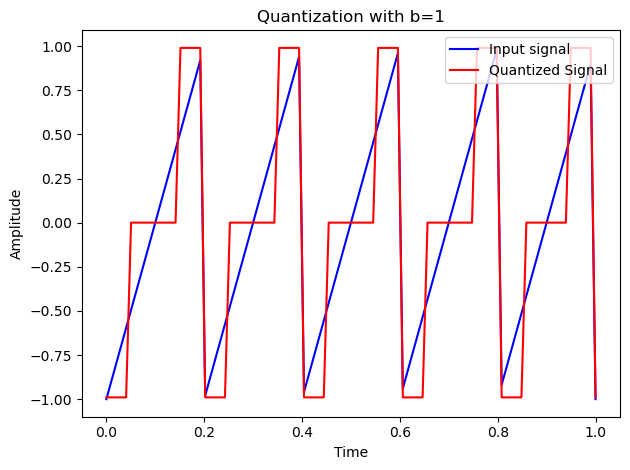

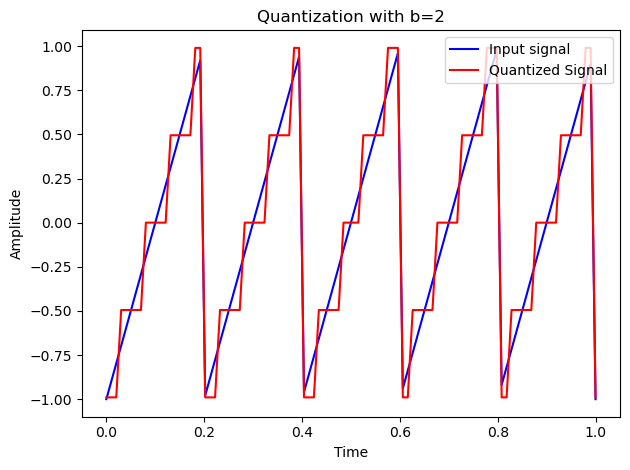

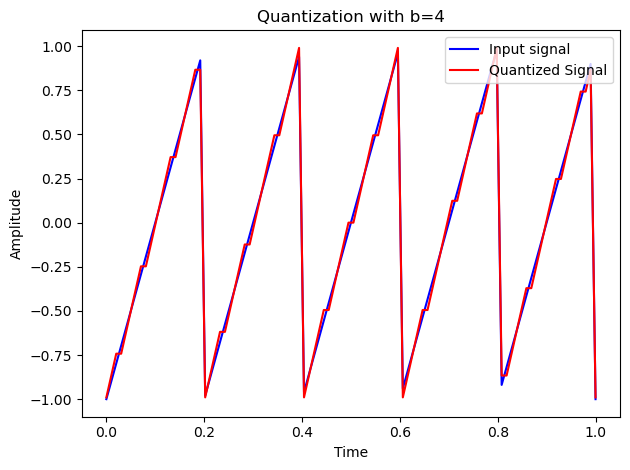

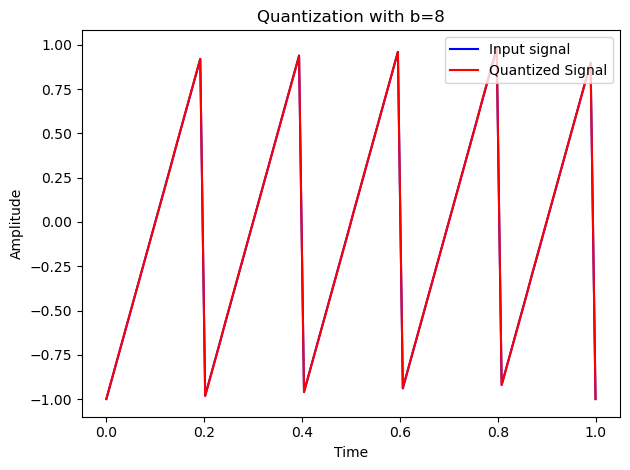

In [8]:
# Uniform Quantization
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Step 1: Generate the input signal
t = np.linspace(0, 1, 100)
x = signal.sawtooth(2 * np.pi * 5 * t)
# Step 2: Parameters of the quantizer
DR = np.max(x) - np.min(x)  # Dynamic range
b = [1, 2, 4, 8]  # Number of bits
for i in range(len(b)):
    L = 2 ** b[i]  # Quantization level
    q = DR / (L)  # Quantization step size
    # Step 3: To obtain the quantized signal
    y = np.sign(x) * q * np.floor((abs(x) / q) + (1 / 2))
    plt.figure(i + 1)
    plt.plot(t, x, "b", t, y, "r"), plt.xlabel("Time"), plt.ylabel("Amplitude")
    plt.legend(["Input signal", "Quantized Signal"], loc="upper right")
    plt.title("Quantization with b={}".format(b[i]))
    plt.tight_layout()

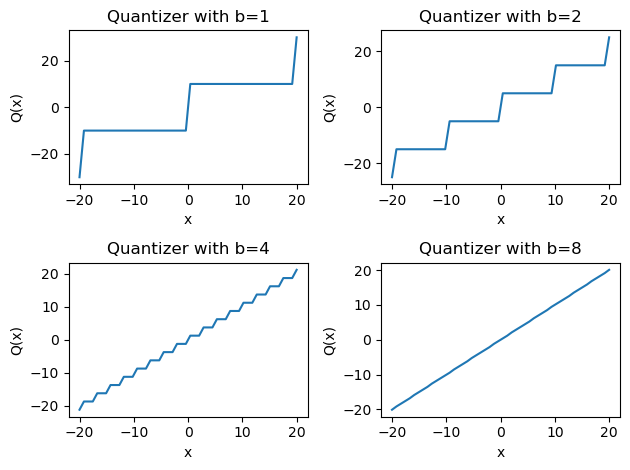

In [9]:
#Transfer characteristics of mid-rise quantizer 
import numpy as np 
import matplotlib.pyplot as plt 
x=np.linspace(-20,20) 
DR=np.max(x)-np.min(x) #Dynamic range 
b=[1,2,4,8] #Bits 
for i in range(len(b)): 
 L=2**b[i] #Reconstruction level 
 q=DR/L 
 #Mid-rise quantizer 
 y=np.sign(x)*q*(np.floor((abs(x)/q))+(1/2)) 
 plt.subplot(2,2,i+1) 
 plt.plot(x,y),plt.xlabel('x'),plt.ylabel('Q(x)') 
 plt.title('Quantizer with b={}' .format(b[i])) 
 plt.tight_layout()

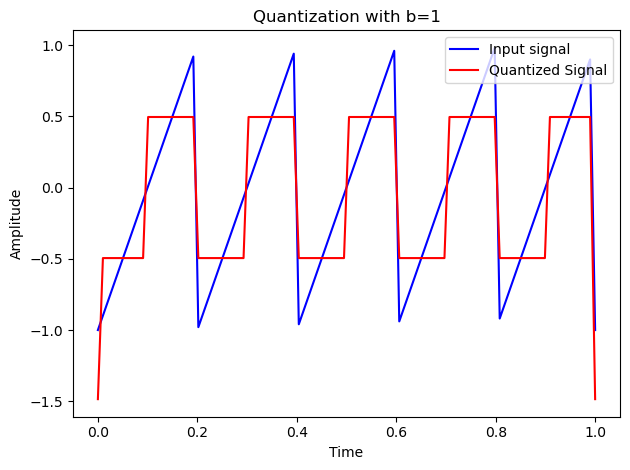

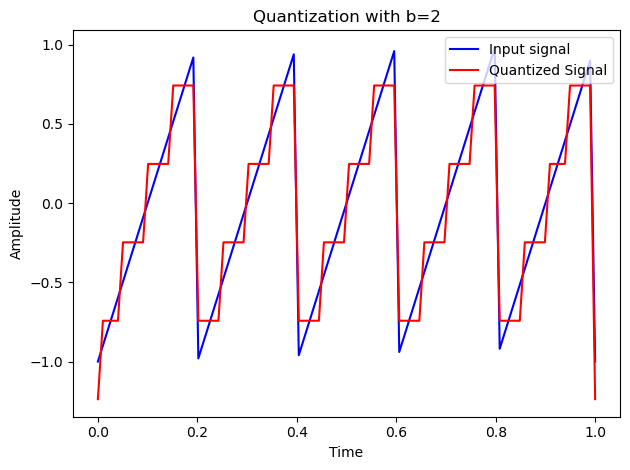

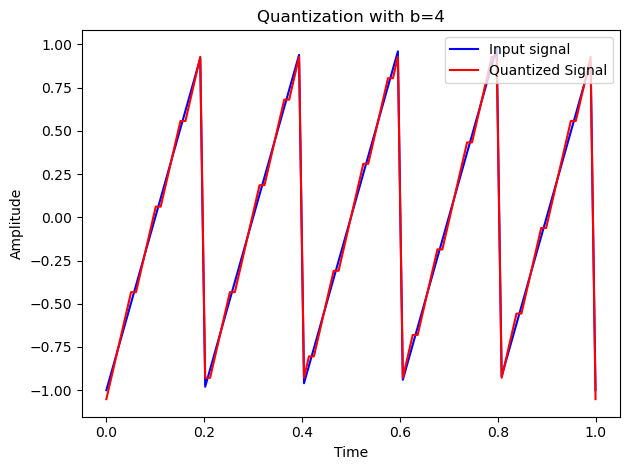

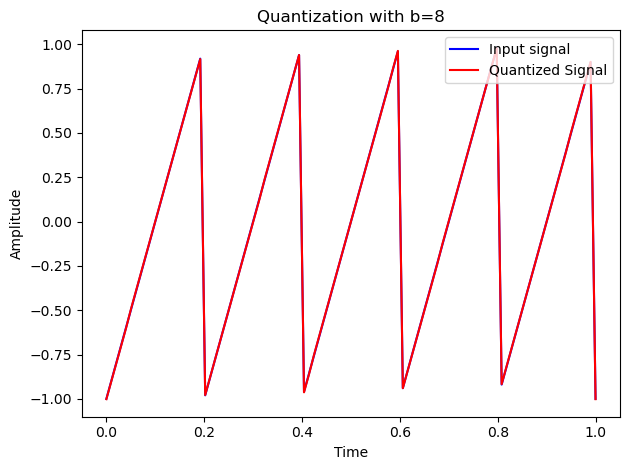

In [10]:
# Uniform mid-rise quantizer
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Step 1: Generate the input signal
t = np.linspace(0, 1, 100)
x = signal.sawtooth(2 * np.pi * 5 * t)
# Step 2: Parameters of the quantizer
DR = np.max(x) - np.min(x)  # Dynamic range
b = [1, 2, 4, 8]  # Number of bits
for i in range(len(b)):
    L = 2 ** b[i]  # Quantization level
    q = DR / (L)  # Quantization step size
    # Step 3: To obtain the quantized signal
    y = np.sign(x) * q * (np.floor((abs(x) / q)) + (1 / 2))
    plt.figure(i + 1)
    plt.plot(t, x, "b", t, y, "r"), plt.xlabel("Time"), plt.ylabel("Amplitude")
    plt.legend(["Input signal", "Quantized Signal"], loc="upper right")
    plt.title("Quantization with b={}".format(b[i]))
    plt.tight_layout()

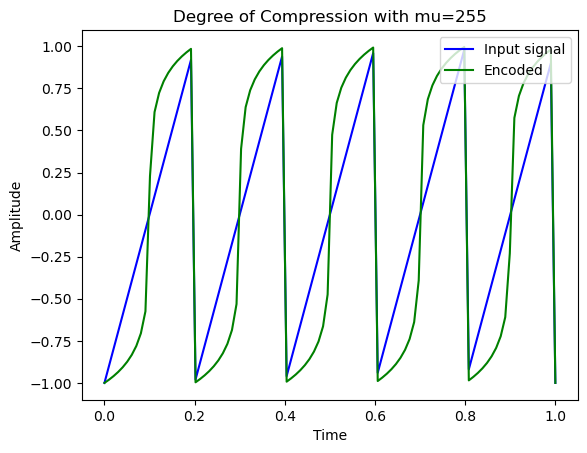

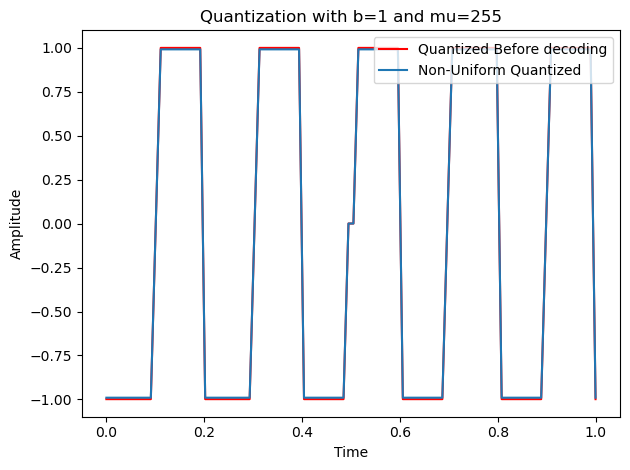

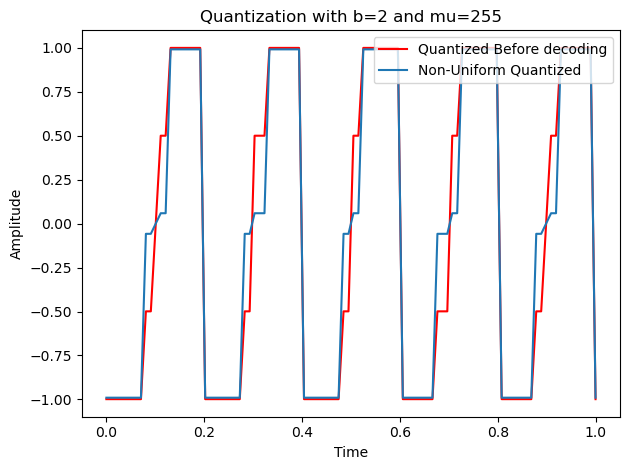

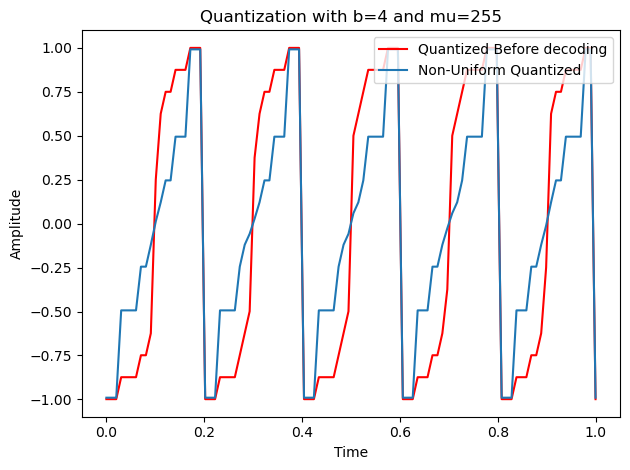

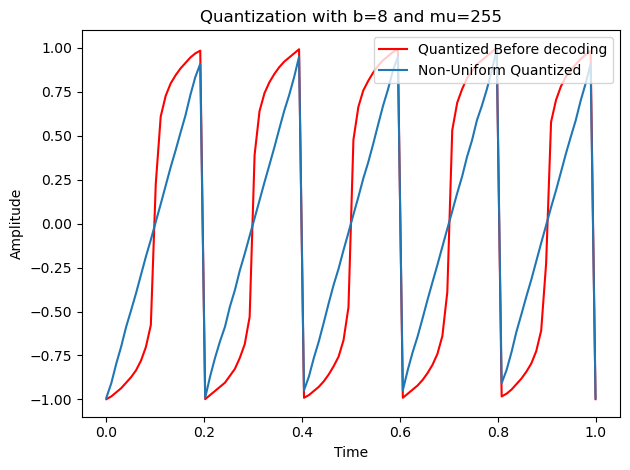

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Step 1: Generate the input signal
t1 = np.linspace(0, 1, 100)
x = signal.sawtooth(2 * np.pi * 5 * t1)
# Step 2: Mu law Encoding (Non-uniform encoding)
mu = 255  # 8 bit Quantization
y1 = np.sign(x) * ((np.log(1 + (mu * abs(x)))) / np.log(1 + mu))
plt.figure(1)
plt.plot(t1, x, "b", t1, y1, "g"), plt.xlabel("Time"), plt.ylabel("Amplitude")
plt.legend(["Input signal", "Encoded"], loc="upper right")
plt.title("Degree of Compression with mu={}".format(mu))
# Step 3: Parameters of the quantizer
DR = np.max(y1) - np.min(y1)  # Dynamic range
b = [1, 2, 4, 8]  # Number of bits
for i in range(len(b)):
    L = 2 ** b[i]  # Quantization level
    q = DR / (L)  # Quantization step size
    # Step 3: To obtain the quantized signal
    y2 = np.sign(y1) * q * np.floor((abs(y1) / q) + (1 / 2))
    y = np.sign(y2) * (((1 + mu) ** (abs(y2)) - 1) / mu)
    plt.figure(i + 2)
    plt.plot(t1, y2, "r", t1, y), plt.xlabel("Time"), plt.ylabel("Amplitude")
    plt.legend(
        ["Quantized Before decoding", "Non-Uniform Quantized"], loc="upper right"
    )
    plt.title("Quantization with b={} and mu={}".format(b[i], mu))
    plt.tight_layout()

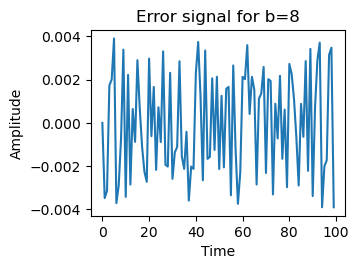

In [14]:
#Error due to quantization 
import numpy as np 
import matplotlib.pyplot as plt 
#Step 1: Generate the input signal 
t=np.linspace(0,1,100) 
x=np.sin(2*np.pi*5*t) 
#Step 2: Parameters of the quantizer 
DR=np.max(x)-np.min(x) #Dynamic range 
b=[1,2,4,8] #Number of bits 
for i in range(len(b)): 
 L=2**b[i] #Quantization level 
 q=DR/(L) #Quantization step size 
#Step 3: To obtain the quantized signal 
 y=np.sign(x)*q*(np.floor((abs(x)/q))+(1/2)) 
#Step 4: Obtain the error signal 
 e=y-x 
#Plot the error signal 
plt.subplot(2,2,i+1), plt.plot(e),plt.xlabel('Time'), plt.ylabel('Amplitude'), 
plt.title('Error signal for b={}'.format(b[i])) 
plt.tight_layout()

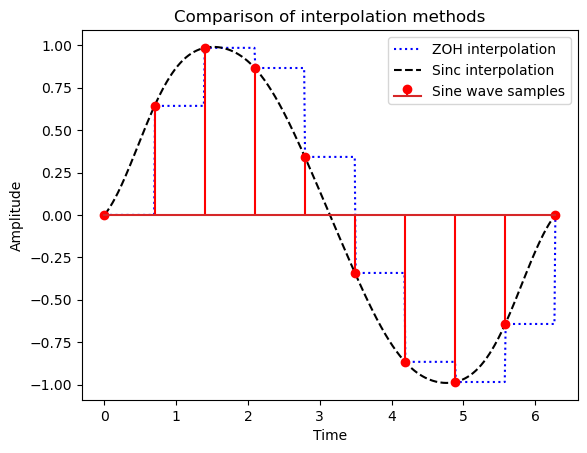

In [17]:
#Ideal and sinc interpolation 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d 
t=np.linspace(0,2*np.pi,10) 
t1 = np.linspace(0, 2 * np.pi, 500)
x = np.sin(t)
# Zero-order hold interpolation
f = interp1d(t, x, kind='previous')
# Sinc interpolation
def sinc_interp(x, s, u):
    if len(x) != len(s):
        raise ValueError('x and s must be the same length')
    T = s[1] - s[0]
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM / T))
    return y
y = sinc_interp(x, t, t1)
plt.plot(t1, f(t1), 'b:'), plt.plot(t1, y, 'k--'), plt.stem(t, x, 'r'), plt.xlabel('Time'),
plt.ylabel('Amplitude'), plt.title('Comparison of interpolation methods')
plt.legend(['ZOH interpolation','Sinc interpolation','Sine wave samples',],loc=1)